In [1]:
import csv
import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression


from matplotlib import cm
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
BWISCONSIN_DATA = '../data/dataset/dataset_bcancer/breast-cancer-wisconsin.data'
BWISCONSIN_NAME = '../data/dataset/dataset_bcancer/breast-cancer-wisconsin.names'
UNFORMATTED_DATA = '../data/dataset/dataset_bcancer/unformatted-data'
WDBC_DATA = '../data/dataset/dataset_bcancer/wdbc.data'
WDBC_NAMES = '../data/dataset/dataset_bcancer/wdbc.names'
WPBC_DATA = '../data/dataset_bcancer/wpbc.data'
WPBC_NAMES = '../data/dataset_bcancer/wpbc.names'

In [3]:
headers = ['id', 'outcome', 'time']
for i in range(1, 33):
    headers.append(f'features{i}')
    
headers[34] = 'lymph_node_status'
headers[33] = 'tumor_size'
    

RAW = pd.read_csv(WPBC_DATA, na_values="?", low_memory=False, names=headers, index_col='id')


In [4]:
RAW.head()

,outcome,time,features1,features2,features3,features4,features5,features6,features7,features8,...,features23,features24,features25,features26,features27,features28,features29,features30,tumor_size,lymph_node_status
id,,,,,,,,,,,,,,,,,,,,,
119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,0.07055,...,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5.0
8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,0.14710,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2.0
842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,0.08180,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0.0
843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,0.10520,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0.0
843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,0.10430,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0.0


In [5]:
X_prog = RAW.iloc[ : , 2:35]
y_prog = RAW.iloc[: , 0]
l = preprocessing.LabelEncoder()
y_prog = l.fit_transform(y_prog)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_prog, y_prog, test_size = 0.3, random_state = 1)
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())

### Logistic Regression using all features (minus time and and outcome)

In [7]:
clf = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs', random_state=1).fit(X_train, y_train)

In [8]:
y_pre = clf.predict(X_test)
print('Score:', clf.score(X_test, y_test))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pre))

Score: 0.7333333333333333
Confusion Matrix:
[[42  3]
 [13  2]]


### Logistic Regression without lymp node status and tumor size

In [9]:
X_train_image_features = X_train.iloc[ : , 0:30]
X_test_image_features = X_test.iloc[ : , 0:30]
clf = LogisticRegression(max_iter=5000, multi_class='multinomial', solver='lbfgs', random_state=1).fit(X_train_image_features, y_train)
y_pre = clf.predict(X_test_image_features)
print('Score:', clf.score(X_test_image_features, y_test))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pre))


Score: 0.7166666666666667
Confusion Matrix:
[[42  3]
 [14  1]]


### Logistic Regression without lymp node status only

In [10]:
X_train_no_lymp_node = X_train.iloc[ : , 0:31]
X_test_no_lymp_node = X_test.iloc[ : , 0:31]
clf = LogisticRegression(max_iter=5000, multi_class='multinomial', solver='lbfgs', random_state=1).fit(X_train_no_lymp_node, y_train)
y_pre = clf.predict(X_test_no_lymp_node)
print('Score:', clf.score(X_test_no_lymp_node, y_test))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pre))

Score: 0.7166666666666667
Confusion Matrix:
[[42  3]
 [14  1]]


### Logistic Regression without tumor size status only

In [11]:
X_train_no_tumor_size = X_train[X_train.columns.difference(['tumor_size'])]
X_test_no_tumor_size = X_test[X_test.columns.difference(['tumor_size'])]
clf = LogisticRegression(max_iter=5000, multi_class='multinomial', solver='lbfgs', random_state=1).fit(X_train_no_tumor_size, y_train)
y_pre = clf.predict(X_test_no_tumor_size)
print('Score:', clf.score(X_test_no_tumor_size, y_test))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pre))

Score: 0.7333333333333333
Confusion Matrix:
[[42  3]
 [13  2]]


### Conclusion

It seems that the image features and the lymp node sizes are the ones contributing to the proper classification.

Also, using logistic regression yields a low classification score and might not be ideal for the data type being used.

### Some analysis

In [24]:
recurr = RAW[RAW.outcome == 'R'].sort_values(by=['time', 'tumor_size'])
no_recurr = RAW[RAW.outcome == 'N'].sort_values(by=['time', 'tumor_size'])

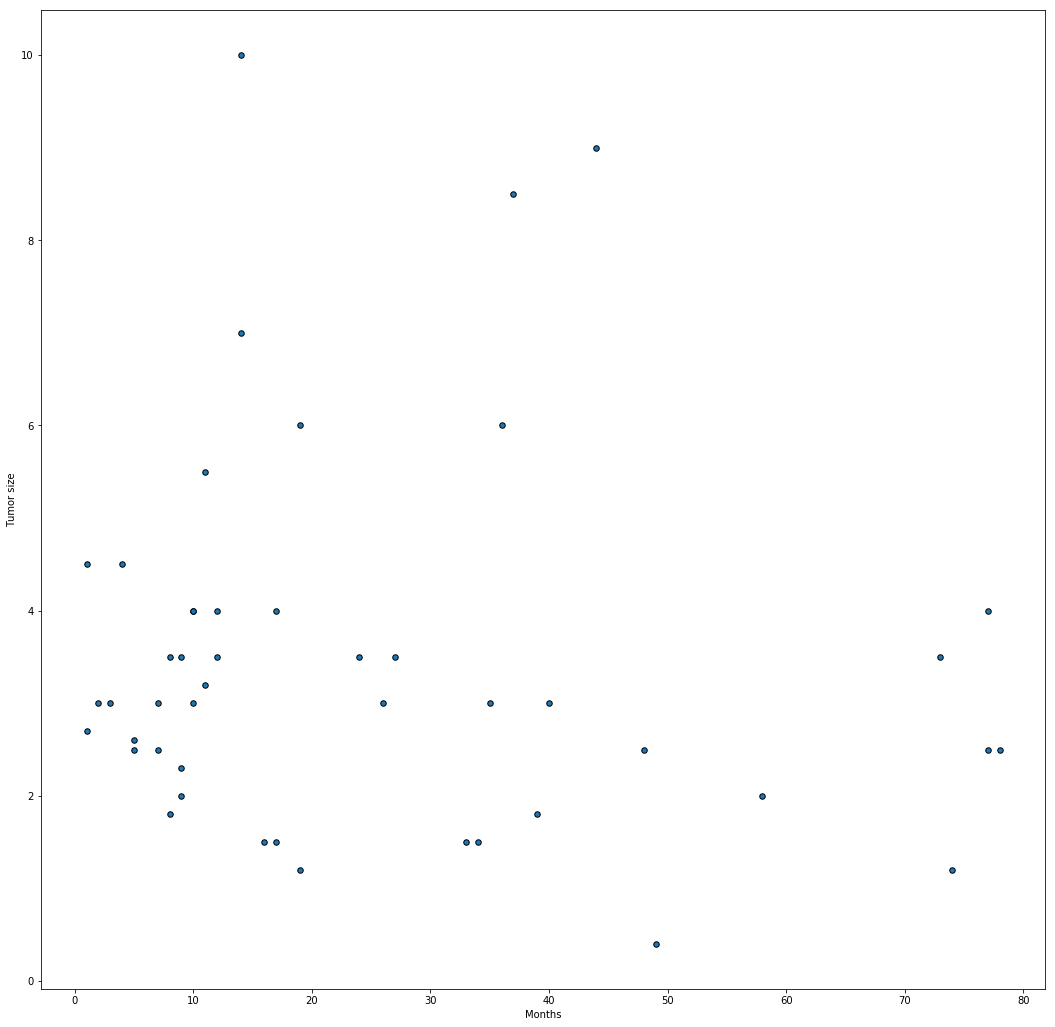

Mean recurrent time in months: 25.085106382978722


In [29]:
fig, ax = plt.subplots(figsize=(18, 18))
ax.scatter(recurr['time'], recurr['tumor_size'], marker='o', s=30, edgecolor='k')
plt.ylabel('Tumor size')
plt.xlabel('Months')
plt.show()

print('Mean recurrent time in months:', recurr['time'].mean())

When comparing the tumor sizes with the reccurence time, we can see that even small tumor size has a high probability of recurring.

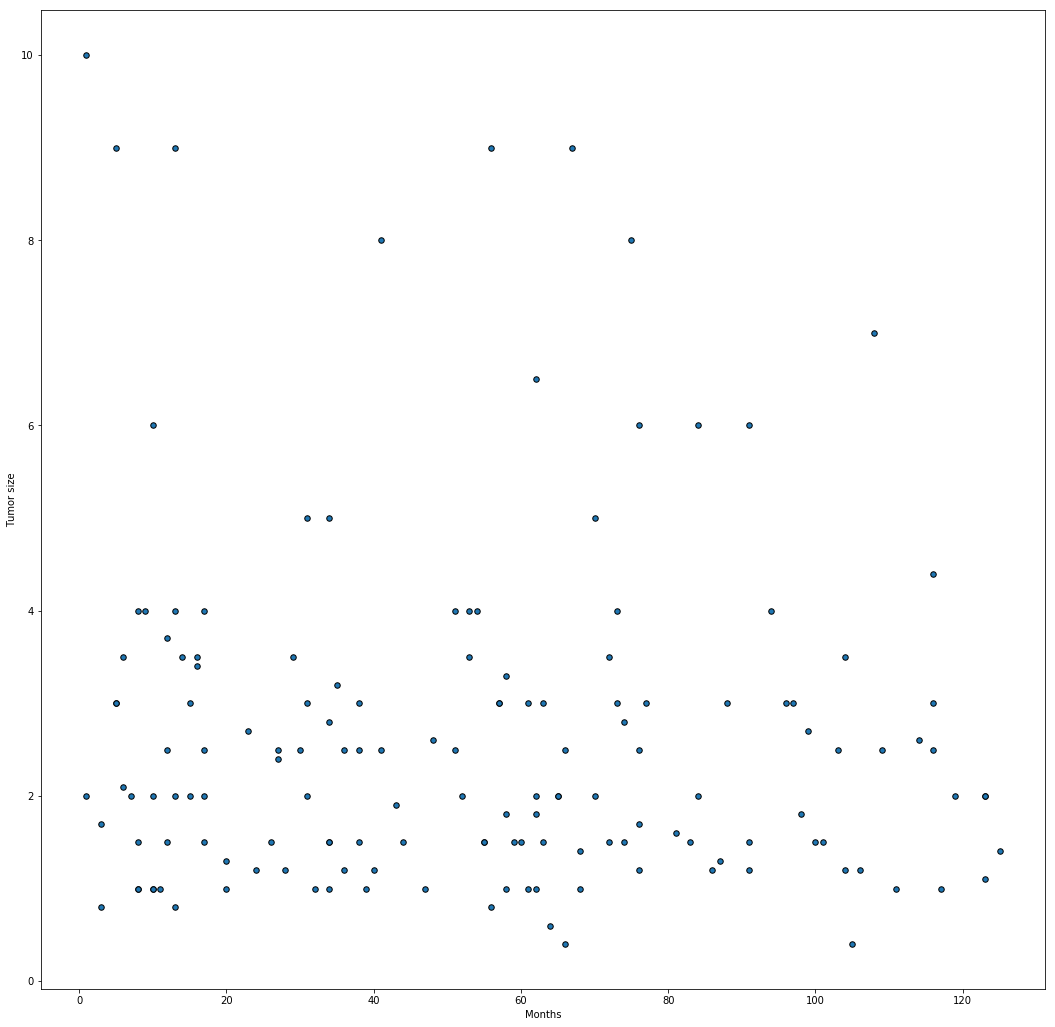

In [27]:
fig, ax = plt.subplots(figsize=(18, 18))
ax.scatter(no_recurr['time'], no_recurr['tumor_size'], marker='o', s=30, edgecolor='k')
plt.ylabel('Tumor size')
plt.xlabel('Months')
plt.show()

Same goes for non recurring

#### Probabilty of recurring

Since the mean time of recurring is 25 months(? or days or weeks?), lets try to get the probabilty of non-recurrent patients with less than 25 (months/weeks) being non-recurring.

In [36]:
non_recurr_less_than = no_recurr[no_recurr.time <= 25]

X_nr = non_recurr_less_than.iloc[ : , 2:35]
y_nr = non_recurr_less_than.iloc[: , 0]
l = preprocessing.LabelEncoder()
y_nr = l.fit_transform(y_nr)

X_r = recurr.iloc[ : , 2:35]
y_r = recurr.iloc[: , 0]
l = preprocessing.LabelEncoder()
y_r = l.fit_transform(y_r)

X_r = X_r.fillna(X_r.mean())
X_nr = X_nr.fillna(X_nr.mean())

### NOTE FROM NINZ

Itutuloy ko dapat to na naive bayse kaso baka nagawa na ni Pam. pero yung idea nya, you can get the probability of the cancer returning para dun sa mga less than 25 (weeks/months) na non-recurring